# Cook Book for LIDAR FWF data processing

Shaig Hamzaliyev

### LIDAR FWF
LIDAR is an abbreviation of Light Detection and Ranging which is an active remote sensing system. In this system there are two ways of recording:

a) Discrete Return LiDAR System - in this case, the system identifies peaks and records point for each peak! A discrete system may record more than 1 returns from each laser pulse.

b) Full Waveform LiDAR System - can record the entire emitted and backscattered signal of each laser pulse. Which provides lots more information.

https://www.neonscience.org/lidar-basics

This report is about processing FWF data and explaining some coding approaches.

However, the first step is getting free data.


#### Downloading NEON Data

It is possible to download NEON data from this website https://data.neonscience.org/data-products/explore. 

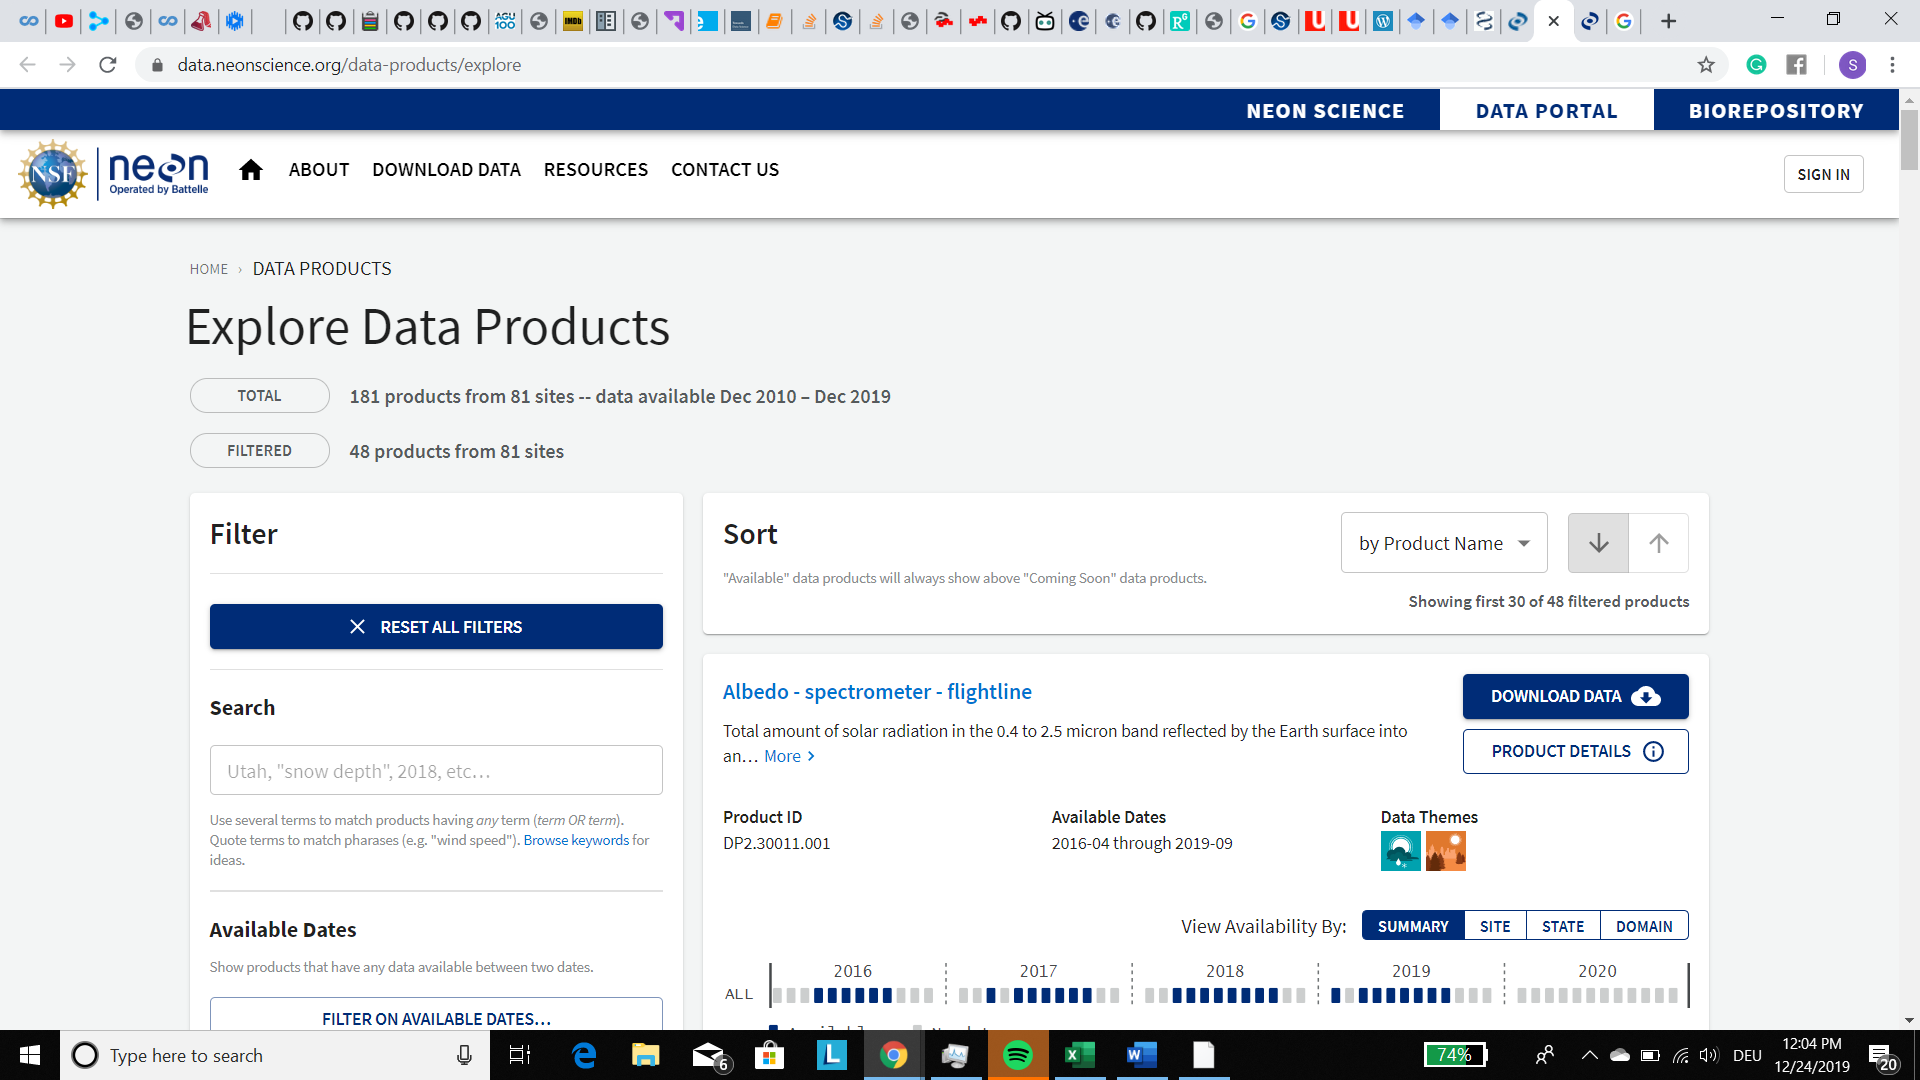

Lidar FWF is under Land Cover & Processes which is possible to find in filters.

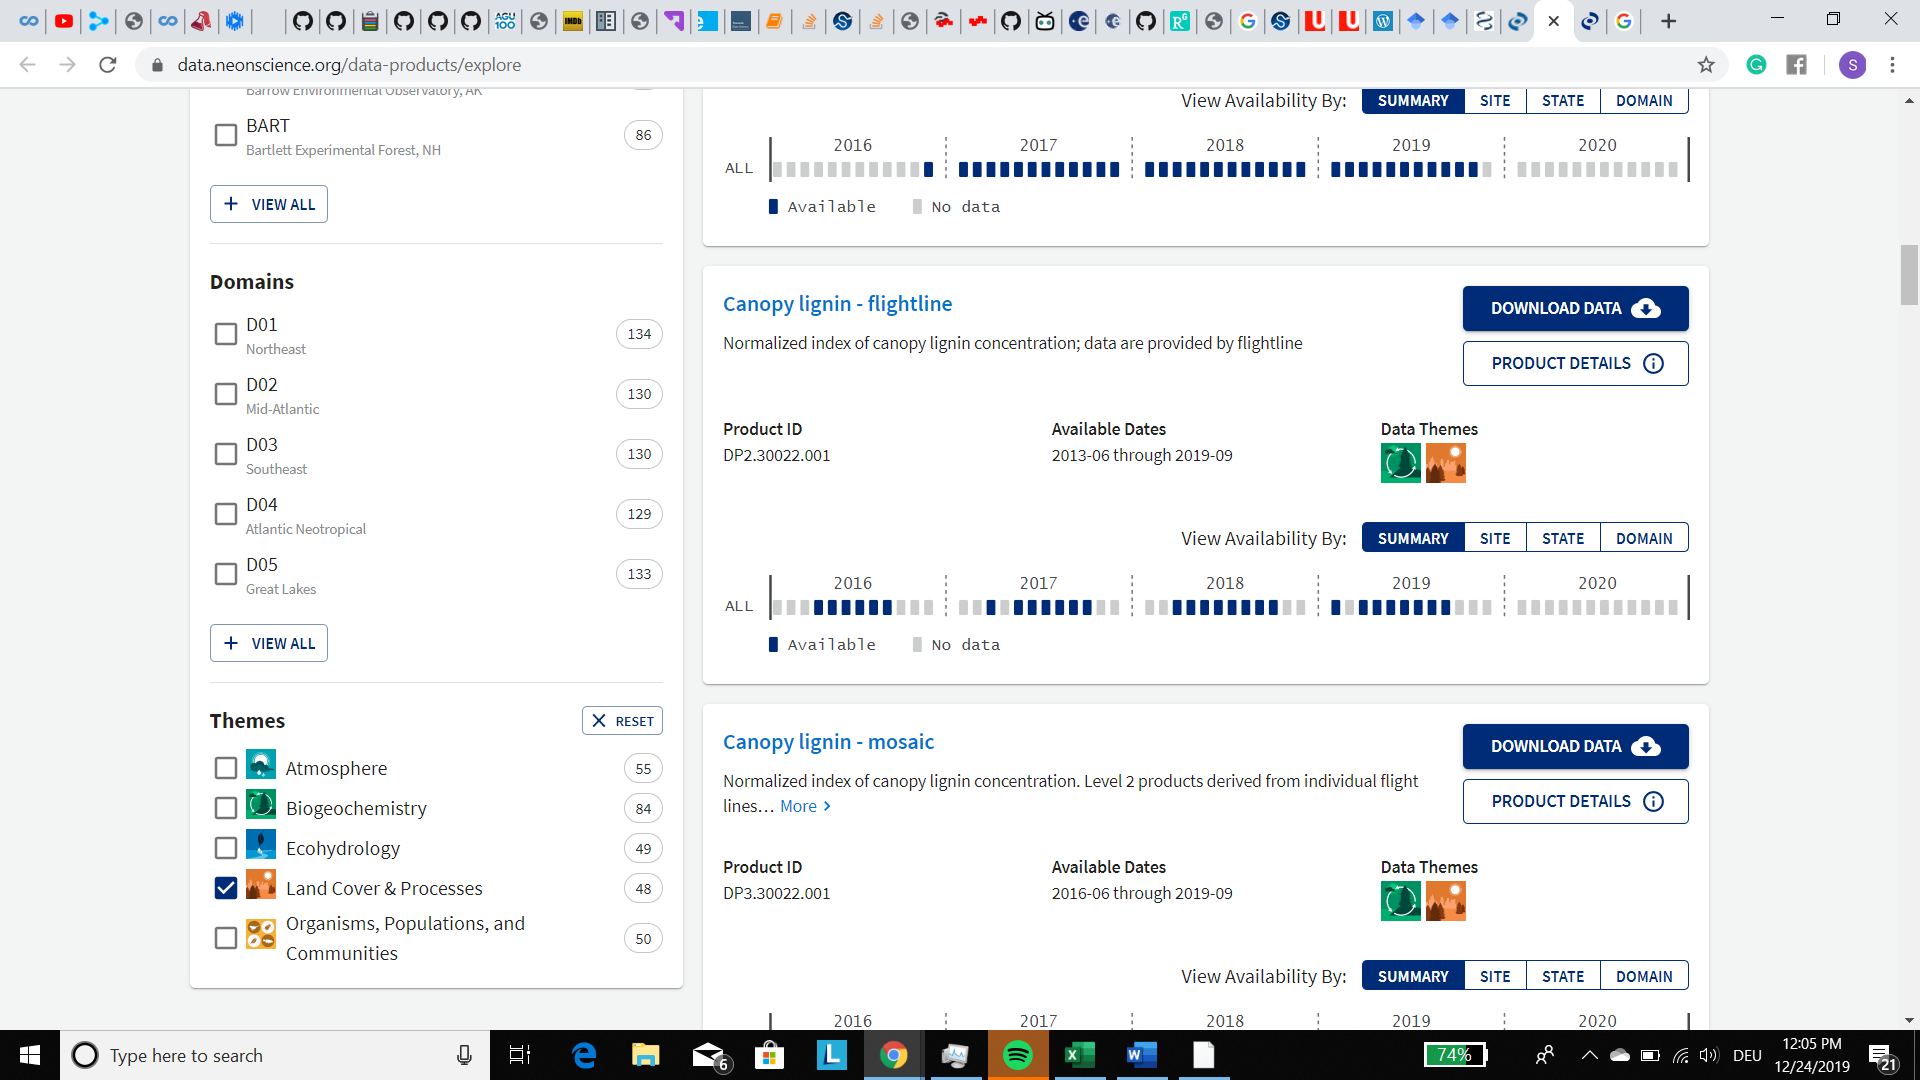

Next step is choosing a date.

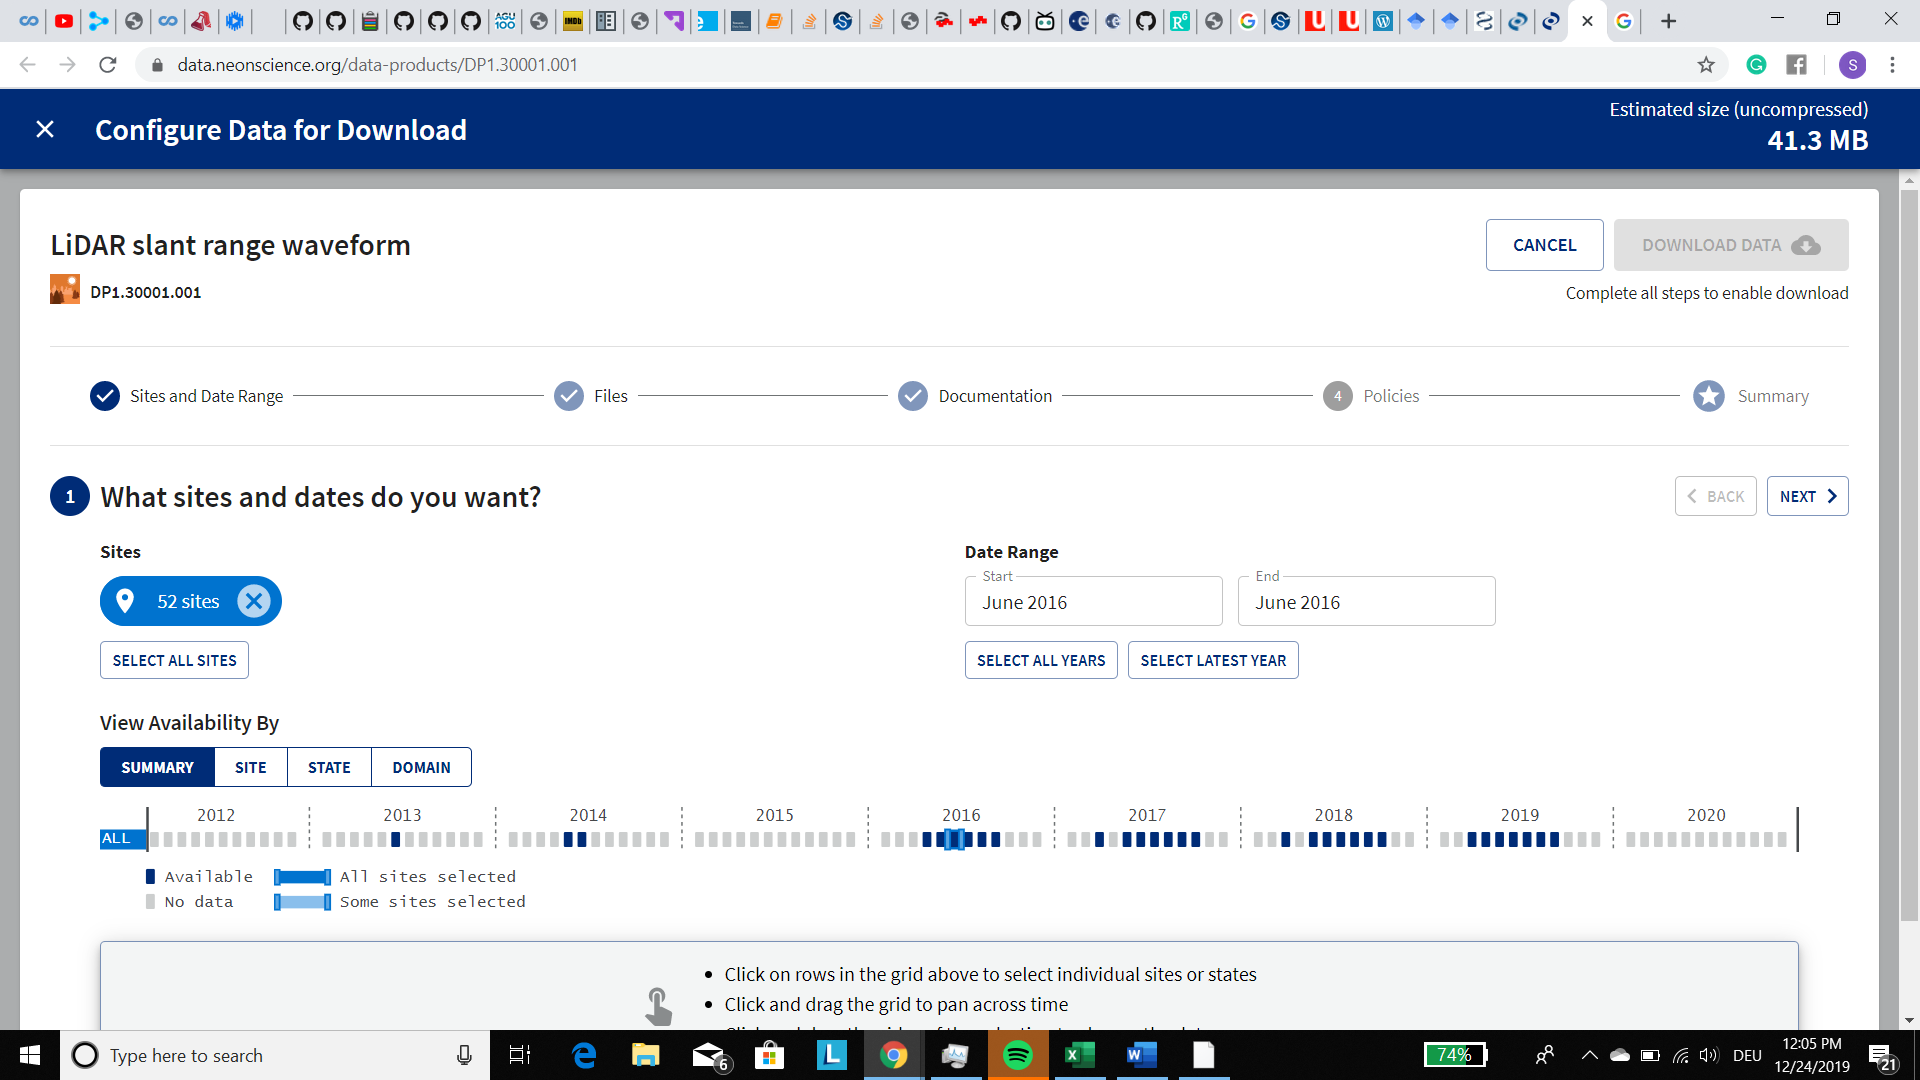

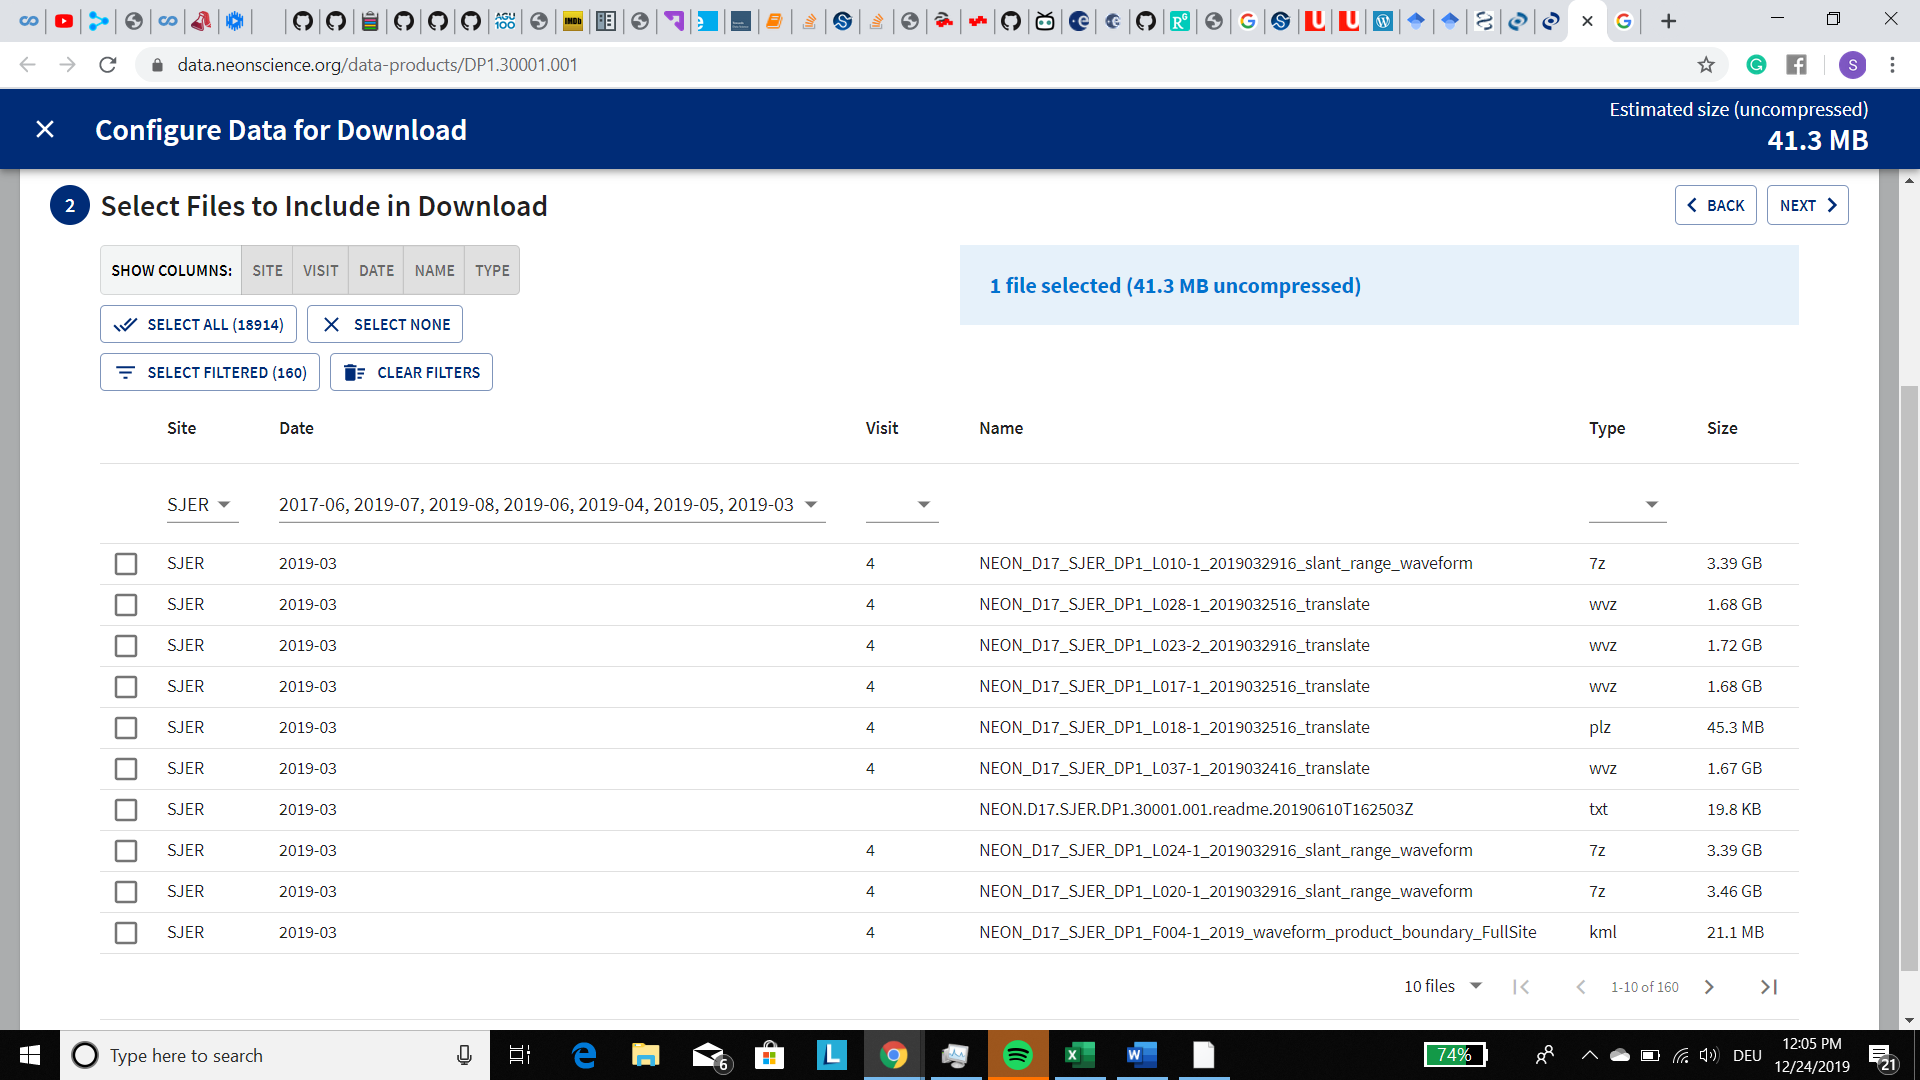

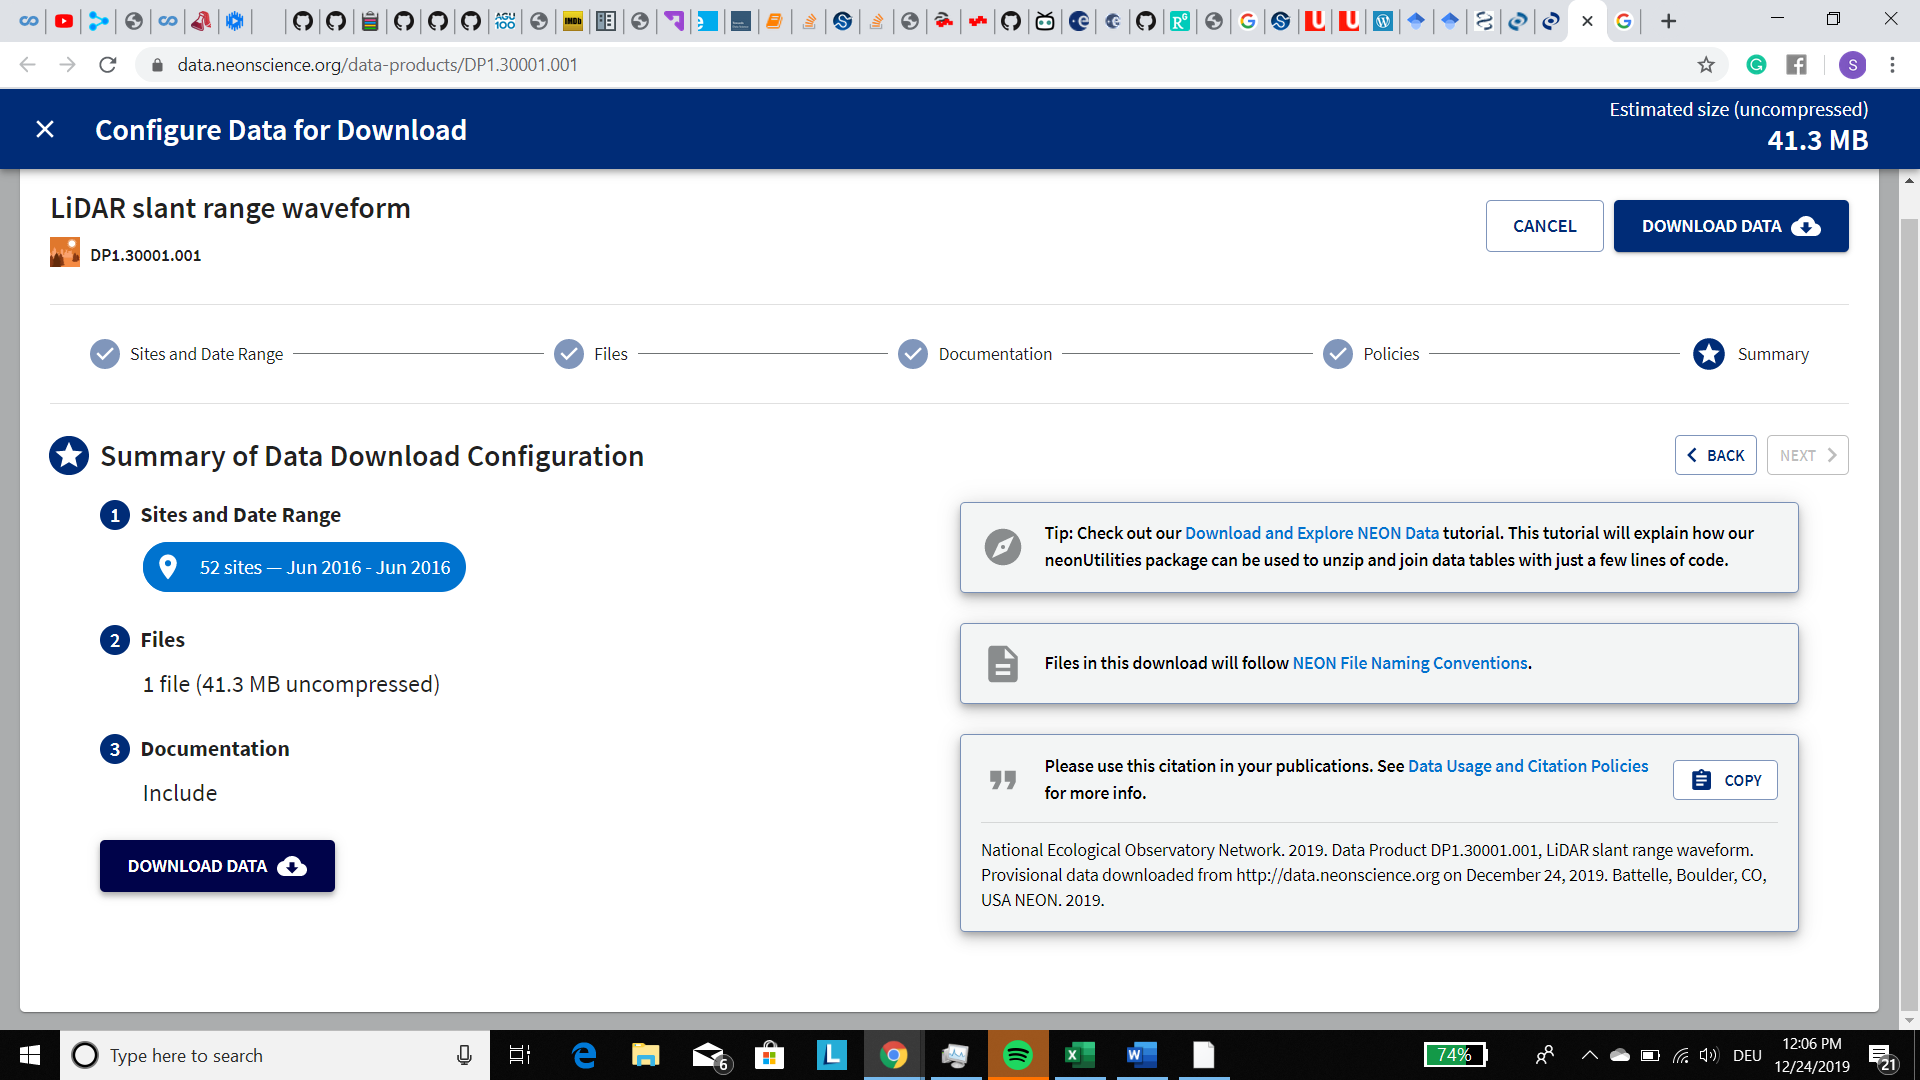

In the end, this page should appear and by just clicking to the DOWNLOAD DATA button data will be downloaded. This example shows how to download the plz file (compressed version of pls file) besides that .wvz file should be downloaded too otherwise it is not possible to convert the data to ASCII file. 

## Converting plz file to ASCII file

There is one python library for reading pulsewave files which called pylidar. However it is not very well documented library. It is possible to convert plz file to ASCII file by using pulse2pulse which might be easier to read. After downloading pulse2pulse from GitHub, it is possible to get ASCII file by running this command in the command line:
~/PulseWaves/PulseTools/pulse2pulse.exe -i NEON.plz -o NEON.asc 

The corresponding .wvz file should be in the same directory with a plz file. Otherwise, an error will occur or command may create an empty file.
For more details please check the links:

https://github.com/PulseWaves/PulseWaves/blob/master/PulseTools/pulse2pulse_README.txt , https://github.com/UP-RS-ESP/PointCloudWorkshop-Oct2019/blob/master/doc/PC_workshop_fwf_processing_Golm.pdf

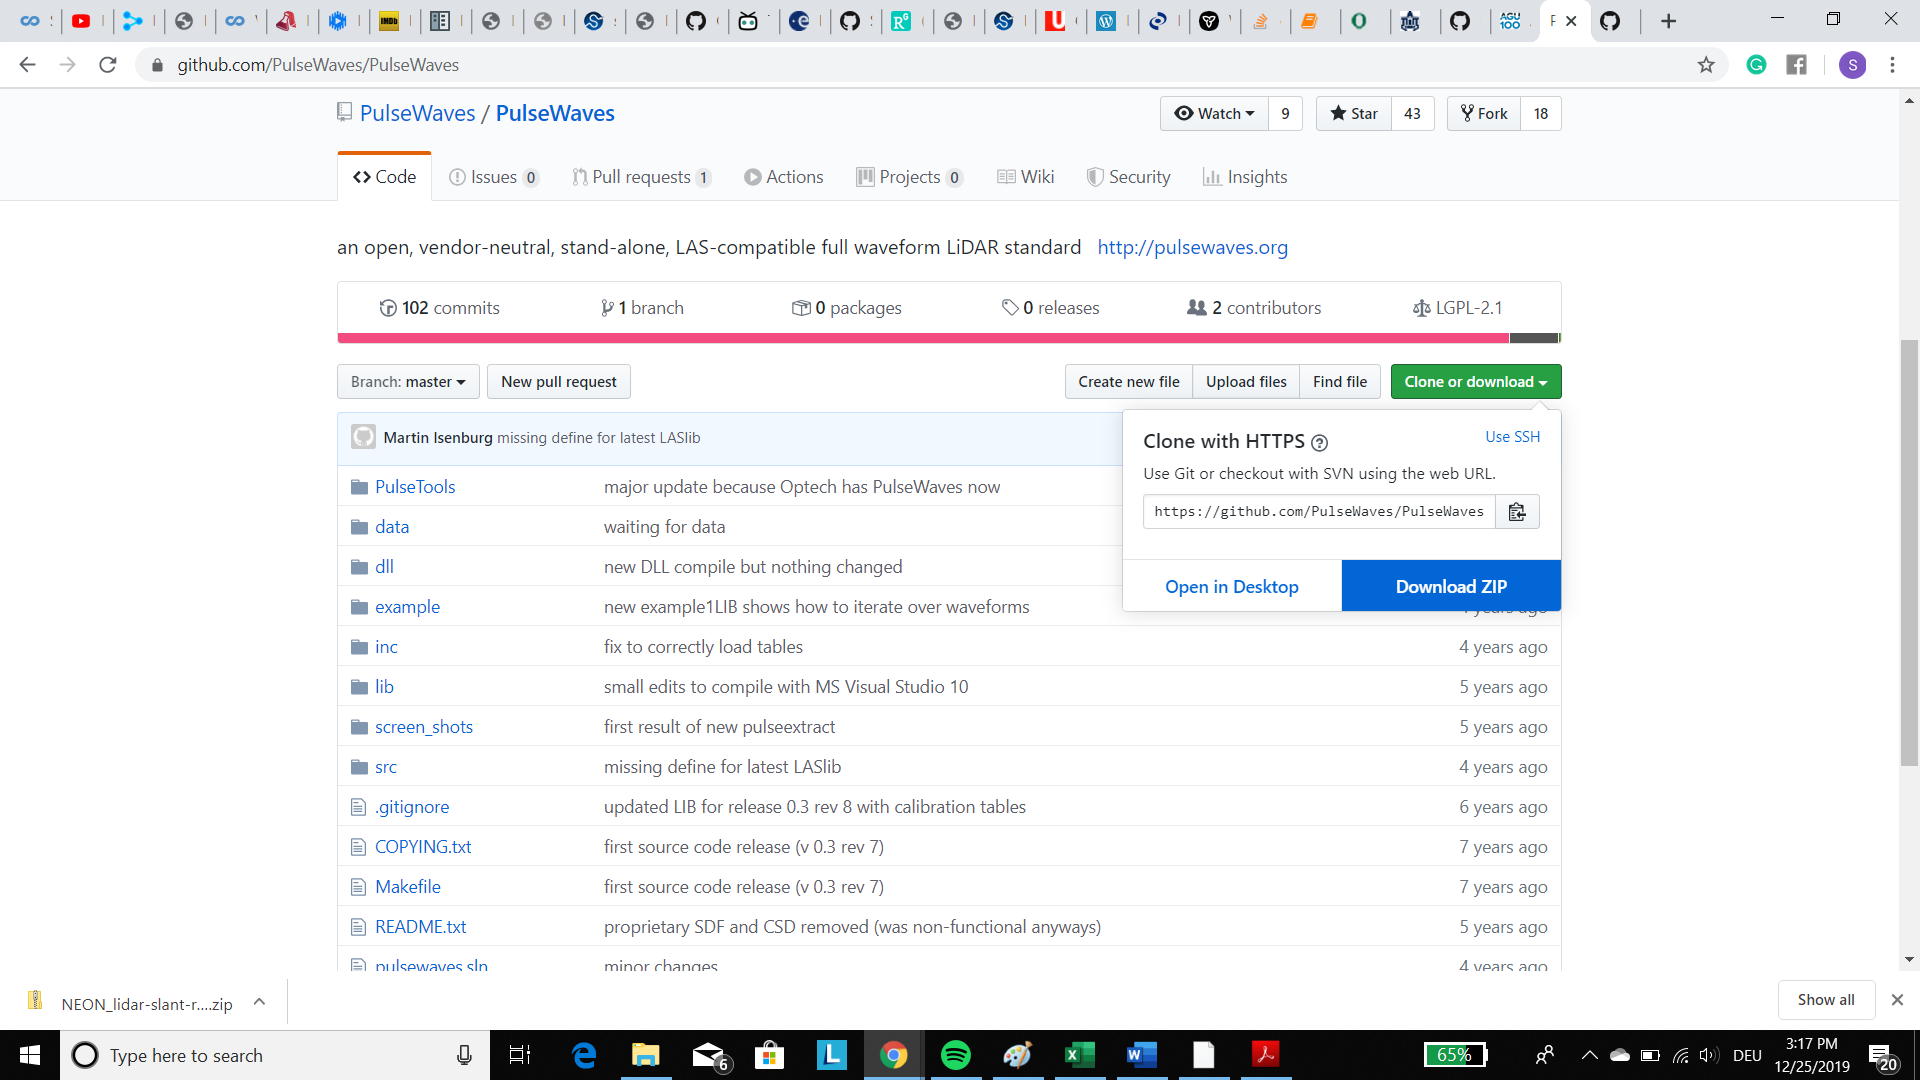

## Reading ASCII file in python

Reading ASCII file is possible by pandas library. ASCII file is a big 11 GB file and it contains more than 334 million rows. Reading the whole dataset is possible but later during some data manipulations, Memory Error will occur. However, in read_csv function by using nrows argument it is possible to define the number of rows.

In [1]:
f = '/home/shaig93/Documents/internship_FWF/f_asc.asc'
import pandas as pd
f_asc = pd.read_csv(f, nrows = 12000)
f_asc.head(24)

file_signature:         PulseWavesPulse
0                           global_parameters:      0
1                         file_source_ID:         111
2   project ID GUID:        341C2D17-7783-4C76-9DA...
3               system_identifier:      'ALTM GEMINI'
4                 generating_software:    'OptechLMS'
5                    file_creation_day_year: 127 2019
6                         version:                0.3
7                         header_size:            352
8                        offset_to_pulse_data:   2880
9                    number_of_pulses:       22729584
10                          pulse_format:           0
11                          pulse_attributes:       0
12                         pulse_size:             48
13                          pulse_compression:      0
14                          reserved:               0
15                          number_of_vlrs:         6
16                          number_of_avlrs:        0
17                     t_scale_factor:         1e-006
18               t_offset:               1.23742e+009
19  min_T max_T             150005503003 150242001995
20             xyz_scale_factors:      0.01 0.01 0.01
21         xyz_offsets:            257000 4.11e+006 0
22  min_x min_y min_z:      251353 4.10992e+006 30...
23  max_x max_y max_z:      263231 4.11096e+006 11...

First 24 rows are header which contains essential information for georeferencing. For automatize, the code simple header function will be useful.

In [2]:
def header(file_path):
    import pandas as pd
    header_df = pd.read_csv(file_path, nrows = 25, header = None)
    header_df = header_df[0].str.rsplit(':', expand = True)
    file_signature = header_df[1].iloc[0]
    global_parameters = float(header_df[1].iloc[1])
    file_source_ID = float(header_df[1].iloc[2])
    project_ID_GUID = header_df[1].iloc[3]
    system_identifier = header_df[1].iloc[4]
    generating_software = header_df[1].iloc[5]
    file_creation_day_year = header_df[1].iloc[6]
    version = float(header_df[1].iloc[7])
    header_size = float(header_df[1].iloc[8])
    offset_to_pulse_data = float(header_df[1].iloc[9])
    number_of_pulses = float(header_df[1].iloc[10])
    pulse_format = float(header_df[1].iloc[11])
    pulse_attributes = float(header_df[1].iloc[12])
    pulse_size = float(header_df[1].iloc[13])
    pulse_compression = float(header_df[1].iloc[14])
    reserved = float(header_df[1].iloc[15])
    number_of_vlrs = float(header_df[1].iloc[16])
    number_of_avlrs = float(header_df[1].iloc[17])
    scale_factor_t = float(header_df[1].iloc[18])
    t_offset = float(header_df[1].iloc[19])
    min_T = float(header_df[0].iloc[20].split()[2])
    max_T = float(header_df[0].iloc[20].split()[3])
    x_scale_factor = float(header_df[1].iloc[21].split()[0])
    y_scale_factor = float(header_df[1].iloc[21].split()[1])
    z_scale_factor = float(header_df[1].iloc[21].split()[2])
    x_offset = float(header_df[1].iloc[22].split()[0])
    y_offset = float(header_df[1].iloc[22].split()[1])
    z_offset = float(header_df[1].iloc[22].split()[2])
    min_x = float(header_df[1].iloc[23].split()[0])
    min_y = float(header_df[1].iloc[23].split()[1])
    min_z = float(header_df[1].iloc[23].split()[2])
    max_x = float(header_df[1].iloc[24].split()[0])
    max_y = float(header_df[1].iloc[24].split()[1])
    max_z = float(header_df[1].iloc[24].split()[2])
    return [x_scale_factor, y_scale_factor, z_scale_factor, x_offset, y_offset, z_offset, file_signature, global_parameters, 
            file_source_ID, project_ID_GUID, system_identifier, generating_software, file_creation_day_year, 
            version, header_size, offset_to_pulse_data, number_of_pulses, pulse_format, pulse_attributes, 
           pulse_size, pulse_compression, reserved, number_of_vlrs, number_of_avlrs, scale_factor_t, t_offset, 
            min_T, max_T, min_x, max_x, min_y, max_y, min_z, max_z]

In [3]:
header(f)

[0.01,
 0.01,
 0.01,
 257000.0,
 4110000.0,
 0.0,
 '         PulseWavesPulse',
 0.0,
 111.0,
 '        341C2D17-7783-4C76-9DA7-48942316453B',
 "      'ALTM GEMINI'",
 "    'OptechLMS'",
 ' 127 2019',
 0.3,
 352.0,
 2880.0,
 22729584.0,
 0.0,
 0.0,
 48.0,
 0.0,
 0.0,
 6.0,
 0.0,
 1e-06,
 1237420000.0,
 150005503003.0,
 150242001995.0,
 251353.0,
 263231.0,
 4109920.0,
 4110960.0,
 304.46,
 1180.56]

It is possible to skip the header and to see the structure of the dataset.

In [4]:
import pandas as pd
f_asc = pd.read_csv(f, skiprows = 25, nrows = 12000, header = None)
f_asc.head(20)

0
0                                                   P
1                                        150005503003
2                                                 891
3                                -565237 61560 136419
4                                -564531 61160 121451
5                                           6652 6707
6                                                   2
7                                             0 0 0 0
8                                                11 0
9                                                   W
10                                                  m
11                                             s 48 0
12   203 203 203 202 205 204 207 201 203 206 205 2...
13                                                  m
14                                          s 56 6652
15   193 193 192 190 192 191 189 191 190 190 191 1...
16                                                  P
17                                       150005503013
18                                               1434
19                               -565237 61560 136419

This structure of data is constantly repeating itself. There are approximately 16 rows for each outgoing and returning signal by reading a certain amount of rows from data some signal might be incomplete. Every sequence starts with P and ends with returning signal information in the tail. This report contains an explanation of some of the important rows by using information from the GitHub page. For more details please check the following link:

https://github.com/PulseWaves/Specification/blob/master/specification.rst . 

In [5]:
f_asc.tail(10)

0
11990                                                  2
11991                                            1 0 0 0
11992                                                4 0
11993                                                  W
11994                                                  m
11995                                             s 48 0
11996   200 203 203 204 202 204 205 202 202 207 210 2...
11997                                                  m
11998                                          s 48 6476
11999   192 192 191 189 189 191 190 192 196 196 196 1...

## PulseWaves - Full Waveform LiDAR Specification

#### Anchor X, Anchor Y, and Anchor Z:
Running this code - f_asc.head(20)- returns indexes for each row and now on things will be explained according to there index numbers. The 3rd indexed row is anchor point of the pulse. Scaling and offseting the integers Anchor X, Anchor Y, and Anchor Z with the scale and offset from the header gives the actual coordinates of the anchor point. In case the Offset from Optical Center to Anchor Point field of the corresponding Pulse Descriptor is zero, the anchor point coincides with the location of the scanner's optical origin (or the pseuso origin) at the time the laser was fired.

x_{anchor} = (X_{anchor} * x_{scale}) + x_{offset}

y_{anchor} = (Y_{anchor} * y_{scale}) + y_{offset}

z_{anchor} = (Z_{anchor} * z_{scale}) + z_{offset}

#### Target X, Target Y, and Target Z:
The 4th indexed row is target point. Specified the pulse by providing a target point theough which the pulse passes that is situated 1000 sampling units away from the anchor in the direction that the pulse was emitted (e.g. towards the ground in an airborne survey). Scaling and offseting the integers Target X, Target Y, and Target Z with the scale and offset from the header gives the actual coordinates of the target point:

x_{target} = (X_{target} * x_{scale}) + x_{offset}

y_{target} = (Y_{target} * y_{scale}) + y_{offset}

z_{target} = (Z_{target} * z_{scale}) + z_{offset}

Using the difference between anchor and target point, a pulse direction vector (dx,dy,dz) can be computed that expresses the distance that the laser pulse travels in one thousand sampling units. Dividing this vector by one thousand results results in a direction vector that is scaled in the length of units of the world coordinate system (e.g. meters for UTM, decimal degrees for long/lat, feet for US stateplane reference systems) chosen for anchor and target points and points away from the origin of the laser:

dx = (x_{target} - x_{anchor}) / 1000 = (X_{target} - X_{anchor}) * x_{scale} / 1000

dy = (y_{target} - y_{anchor}) / 1000 = (Y_{target} - Y_{anchor}) * y_{scale} / 1000

dz = (z_{target} - z_{anchor}) / 1000 = (Z_{target} - Z_{anchor}) * z_{scale} / 1000

#### First Returning Sample:
Row number 5 is first and last returning sample. The duration in sampling units from the anchor point to the first recorded waveform sample. Together with the anchor point and the pulse direction vector, this value allows computing the x/y/z world coordinates of the first sample that was recorded for the returning waveform of this pulse:

x_{first} = x_{anchor} + first_returning_sample * dx

y_{first} = y_{anchor} + first_returning_sample * dy

z_{first} = z_{anchor} + first_returning_sample * dz

For pulses that do not have a returning waveform this value must be set to zero.

#### Last Returning Sample:
Same concept as the First Returning Sample but for the last one:

x_{last} = x_{anchor} + last_returning_sample * dx

y_{last} = y_{anchor} + last_returning_sample * dy

z_{last} = z_{anchor} + last_returning_sample * dz

For pulses that do not have a returning waveform this value must be set to zero.

As each sequence starts with P  by simple indexing it is possible to call values. In this case, P will be a reference point.

In [6]:
def data_extraction(f_asc):
    import numpy as np
    data = np.array(np.split(f_asc.to_numpy(), np.where(f_asc.to_numpy()[:, 0] == 'P')[0]))[1:]
    rtn = []
    rtn_all = []
    for i in range(len(data)):
        for j in range(len(data[i])):
            if len(data[i][j][0].split()) > 10:
                rtn.append(j)
    rtnp = np.array(rtn)
    sgm = np.array(np.split(rtnp, np.where(rtnp == 12)[0])[1:])
    rtnall = []
    xyz_anc = []
    xyz_trg = []
    frst_lst = []
    for i in range(len(data)):
        an = data[i][3]
        trg = data[i][4]
        frls = data[i][5]
        rrr = data[i][sgm[i][1:]]
        rtnall.append(rrr)
        xyz_anc.append(an)
        xyz_trg.append(trg)
        frst_lst.append(frls)
    rtn_all = np.array(rtnall)
    tb = []
    for i in range(len(rtn_all)):
        if len(rtn_all[i]) < 2:
            t = np.array(rtn_all[i][0][0].split()).astype(int)
        else:
            t = np.array(np.sum(rtn_all[i]).split()).astype(int)
        tb.append(t)
    rtinp = np.array(tb)
    xyz_anc_np = np.array(xyz_anc)
    xyz_trg_np = np.array(xyz_trg)
    frst_lst_np = np.array(frst_lst)
    anch = []
    trgt = []
    frls = []
    for i in range(len(xyz_anc_np)):
        ff = np.array(np.squeeze(xyz_anc_np)[i].split()).astype(int)
        dd = np.array(np.squeeze(xyz_trg_np)[i].split()).astype(int)
        ss = np.array(np.squeeze(frst_lst_np)[i].split()).astype(int)
        anch.append(ff)
        trgt.append(dd)
        frls.append(ss)
    anch = np.array(anch)
    trgt = np.array(trgt)
    frls = np.array(frls)
    return rtinp, anch, trgt, frls

In [7]:
rtinp, anch, trgt, frls = data_extraction(f_asc)

Georeferencing of signals by using above-mentioned equations.

In [8]:
def georeferencing(path, file_pd):
    import numpy as np
    header_ = header(f)
    data_extraction_ = data_extraction(f_asc)
    x_scl = header_[0]
    y_scl = header_[1]
    z_scl = header_[2]
    x_off = header_[3]
    y_off = header_[4]
    z_off = header_[5]
    x_trg = data_extraction_[2][:, 0] * x_scl + x_off
    y_trg = data_extraction_[2][:, 1] * y_scl + y_off
    z_trg = data_extraction_[2][:, 2] * z_scl + z_off
    x_an = data_extraction_[1][:, 0] * x_scl + x_off
    y_an = data_extraction_[1][:, 1] * y_scl + y_off
    z_an = data_extraction_[1][:, 2] * z_scl + z_off
    dx = (x_trg - x_an) / 1000
    dy = (y_trg - y_an) / 1000
    dz = (z_trg - z_an) / 1000
    first_rtn = data_extraction_[3][:, 0]
    first_rtn_ = []
    for i in range(len(data_extraction_[0])):
        dd = first_rtn[i] + np.arange(data_extraction_[0][i].shape[0])
        first_rtn_.append(dd)
    first_rtn_ar = np.array(first_rtn_)
    x_w = np.concatenate((x_an + first_rtn_ar * dx))
    y_w = np.concatenate((y_an + first_rtn_ar * dy))
    z_w = np.concatenate((z_an + first_rtn_ar * dz))
    points = np.transpose((x_w, y_w, z_w))
    ints_conc = np.concatenate(data_extraction_[0])
    return [points, ints_conc]

In [9]:
import numpy as np
points, ints_conc = georeferencing(f, f_asc)

In [12]:
points[:10]

array([[2.51394593e+05, 4.11058899e+06, 3.68518640e+02],
       [2.51394600e+05, 4.11058899e+06, 3.68368960e+02],
       [2.51394607e+05, 4.11058898e+06, 3.68219280e+02],
       [2.51394614e+05, 4.11058898e+06, 3.68069600e+02],
       [2.51394621e+05, 4.11058898e+06, 3.67919920e+02],
       [2.51394628e+05, 4.11058897e+06, 3.67770240e+02],
       [2.51394635e+05, 4.11058897e+06, 3.67620560e+02],
       [2.51394643e+05, 4.11058896e+06, 3.67470880e+02],
       [2.51394650e+05, 4.11058896e+06, 3.67321200e+02],
       [2.51394657e+05, 4.11058896e+06, 3.67171520e+02]])

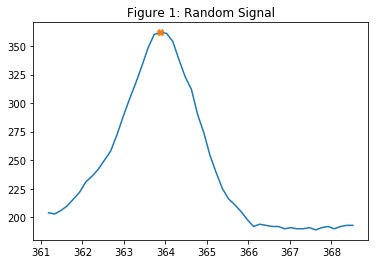

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
signal_random = ints_conc[:50]#[~np.isnan(ints_conc[:104])]
peaks_random, properties_random = find_peaks(signal_random, prominence = 5)
plt.plot(points[:, 2][:50], ints_conc[:50])
plt.plot(points[:, 2][:50][peaks_random], ints_conc[peaks_random], 'X')
plt.title('Figure 1: Random Signal')
plt.show()

The signal in figure 1 seems fine. Now by creating a point cloud structure of the data will be visually more clear. Also by assigning the intensity as RGB colour, it will be easy to distinguish where intensity has a higher value.

In [55]:
import matplotlib.pyplot as plt # This function belongs to Dr. Aljoscha Rheinwalt
def save(fn, var, pts, cmap = plt.cm.magma_r):  
    v = np.array(var[:], dtype = 'float')
    x, y, z = pts[:, 0], pts[:, 1], pts[:, 2]
    v -= np.nanmin(v)
    v /= np.nanmax(v)
    #v /= 478.0
    rgb = cmap(v)
    rgb = rgb[:, :3]
    rgb *= 65535
    rgb = rgb.astype('uint')
    header = laspy.header.Header()
    header.data_format_id = 2
    g = laspy.file.File(fn, mode = 'w', header = header)
    g.header.scale = [0.001, 0.001, 0.001]
    g.header.offset = [x.min(), y.min(), z.min()]
    g.x = x
    g.y = y
    g.z = z
    g.set_red(rgb[:, 0])
    g.set_green(rgb[:, 1])
    g.set_blue(rgb[:, 2])
    g.close()

In [57]:
import numpy as np
import laspy
fwf = 'full_wave.las'
save(fwf, ints_conc, points)

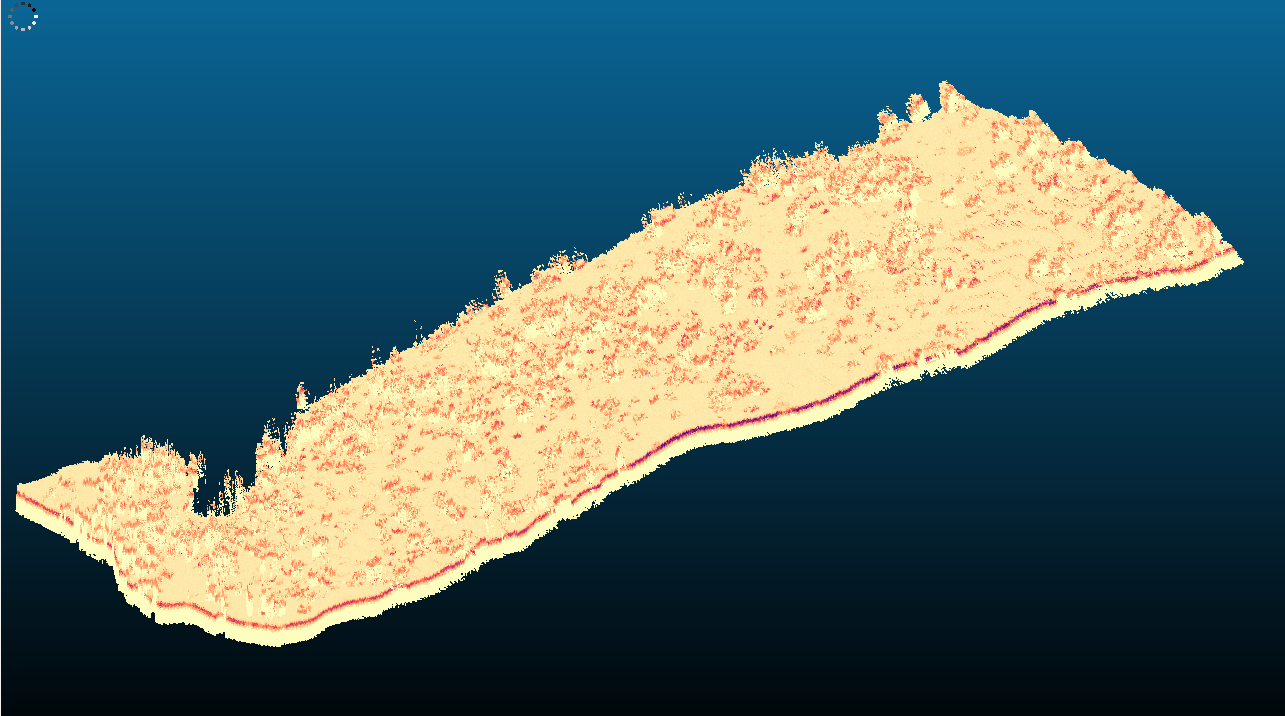

###### Figure 2: Full-wave Point Cloud

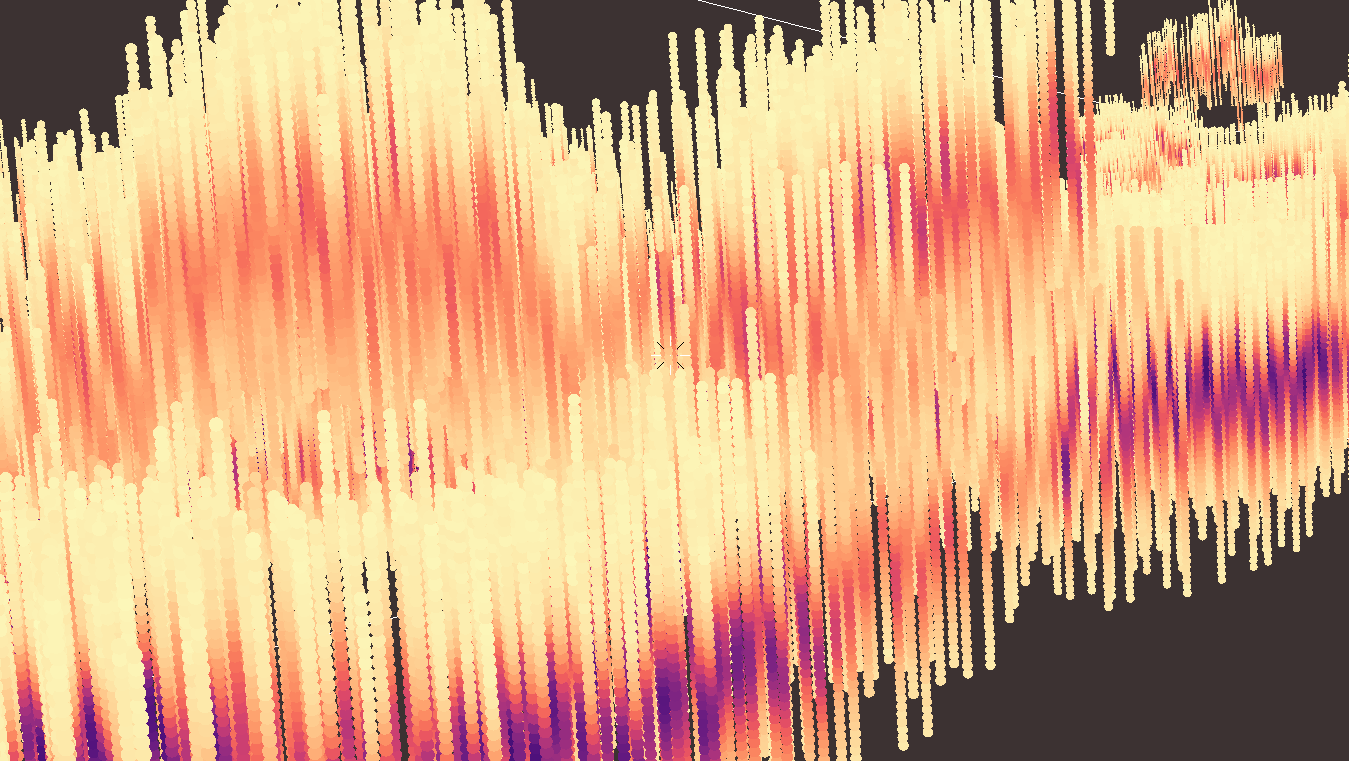

###### Figure 3: Point Cloud - closer look

By looking figure 3 closer it seems like points have a stick kind of structure which does make sense as each pulse has same x, y coordinates. Also, as mentioned before the colour difference stands for intensity when it is high colour gets more reddish.

Now next step is applying find_peaks function to the dataset. It will serve to get a less denser point cloud. However before that little information about one important argument in this function which is prominence. The prominence of a peak measures how much the peak sticks out due to its intrinsic height and its location relative to other peaks. A low isolated peak can be more prominent than one that is higher but is an otherwise unremarkable member of a tall range. It is easy to see how prominence will affect our dataset by creating two point clouds with different prominence values.

In [58]:
from scipy.signal import find_peaks
peaks7, properties7 = find_peaks(ints_conc, prominence = 7)
peaks2, properties2 = find_peaks(ints_conc, prominence = 2)

In [59]:
import laspy
path_2 = 'prominence_2.las'
path_7 = 'prominence_7.las'
save(path_2, ints_conc[peaks2], points[peaks2])
save(path_7, ints_conc[peaks7], points[peaks7])

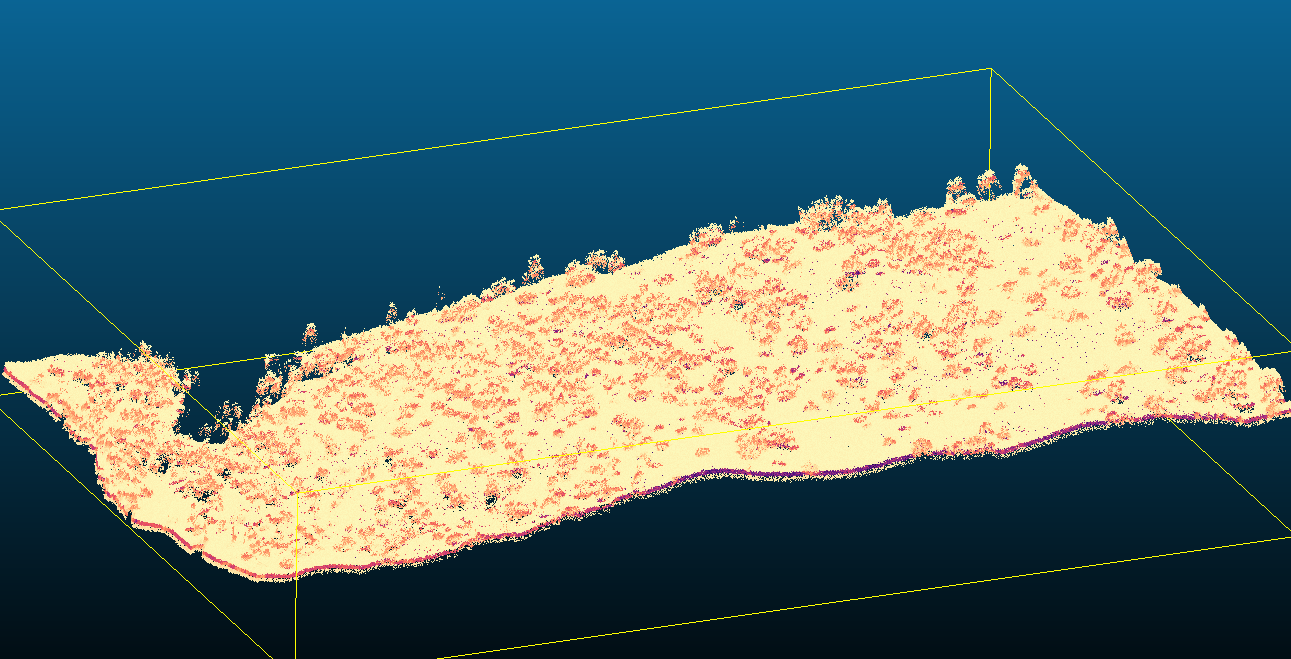

###### Figure 4: Point Cloud: prominence = 2

Full-wave point cloud (figure 2) had more than 37 million points but peaks with prominence = 2 have approximately 2 million points (figure 4). However, it is still noisy. About the noise, it is good to mentioning that if the ground has white points above or below it that is the main sign of noise. Because ground reflects the pulse very good. Good return means that intensity is high and it makes the ground more reddish than trees or bushes. 

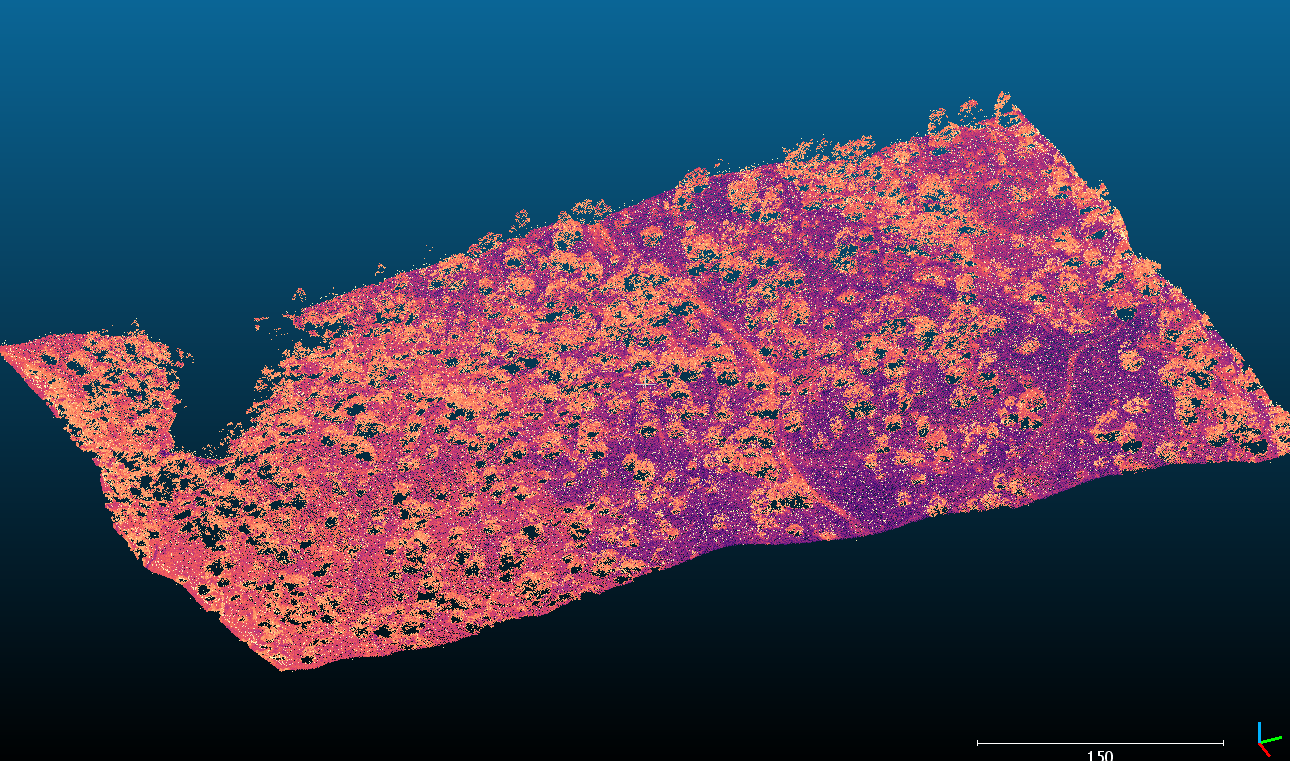

###### Figure 5: Point Cloud: prominence = 7

Figure number 5 is cleaner than previous point clouds. It is easy to distinguish the ground. There is still some white points but it is fine. Point cloud with prominence = 7 contains more than 800000 points.

## Gaussian Fitting

Fitting Gaussian may cause some distortions. The reason is some signals have 2 or maybe even more peaks. By splitting signals we can avoid distortion. For being able to do the splitting first step is flipping the data and finding the peaks then split signals according to these peaks. (Figure 6)

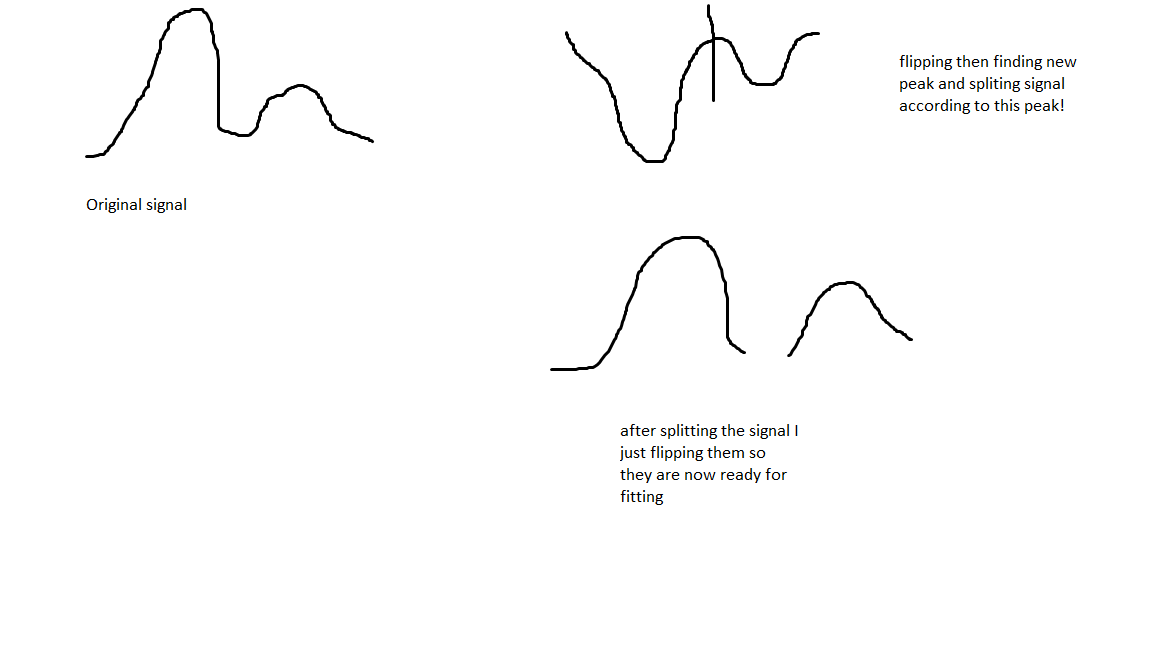

###### Figure 6: Explanation of the splitting process

The splitting function will do the whole process. However, inside this function, we also calculated the mean of the first 3 points of each signal and subtracted it from signals. In the end, our intensity will have fine numbers.

In [60]:
import numpy as np
from scipy.signal import find_peaks
def splitting(ints_concatenated):
    ints_flp = - ints_concatenated[~np.isnan(ints_concatenated)]
    peak_flp, proper_flp = find_peaks(ints_flp, prominence=5) 
    ints_spl_pk = np.split(ints_flp, peak_flp)
    np_list = []
    for i in ints_spl_pk:
        i = -i
        np_list.append(i)
    np_lst_noise = []
    for j in np_list:
        noise = np.nanmean(j[:3])
        j = j - noise
        np_lst_noise.append(j)
    return np_lst_noise, peak_flp

In [62]:
np_lst_noise, peak_flp = splitting(ints_conc)

One more important thing about splitting function is getting rid of nan values. In the first place, we read the data with the pandas library, which creates a data frame. Dataframe's takes the longest row and defines the column numbers according to that. It means that if the row length is 40 but the longest row in data frame has 50 columns then pandas will add 10 more columns of none values to 40 rows. It is not very memory friendly and in our dataset more than 40 per cent of data is none. This is same with numpy ndarrays too. If all arrays do not have the same shape then it is even impossible to create a numpy ndarray. The trick would be first creating a list of numpy arrays. As lists do not care if it's elements has the same shape or not then nan values will not be needed. However, working with lists is slow also if values are not scalar indexing will be more tricky too. The simple solution would be converting a list to a numpy array -- np.array(list) -- result will be a numpy array where elements are numpy arrays.

Now our data is ready for fitting. 

It is possible to find Gaussian functions from the internet. The Gaussian function and fit function that we are using here is from the following link:

https://github.com/UP-RS-ESP/PointCloudWorkshop-Oct2019/blob/master/examples/Golm-FWF/fwf_peaks_with_Gaussian_fitting.py

The first thing is defining Gaussian function itself. The second function is fit_gaussian function where Model from lmfit library calls the Gaussian function and takes it as a model.

In [63]:
def gaussian(x, amp, cen, wid):
    """1-d gaussian: gaussian(x, amp, cen, wid)"""
    return (amp / (np.sqrt(2*np.pi) * wid)) * np.exp(-(x-cen)**2 / (2*wid**2))

def fit_gaussian(y, x_ns, pt_intensity, identified_point_ns, wid=1):
    from lmfit import Model
    gmodel = Model(gaussian)
    result = gmodel.fit(y, x=x_ns, amp=pt_intensity, cen=identified_point_ns, wid=wid)
    peak_width = result.best_values['wid']
    peak_amp = result.best_values['amp']
    peak_center = result.best_values['cen']
    return peak_width, peak_amp, peak_center

Full-Waveform data usually is very noisy and it can also include multiple returns which are closer. It will cause a problem with fitting where the initial peak will be used. Smoothing can resolve the problem but before that data need to be ready for it. The first step is splitting x, y, z coordinates by using peaks from splitting function. Secondly, signals that have shorter length need to be removed. The reason is smoothing function requires signal length to be at least 3. However, it is impossible to fit gaussian to a signal with a length of 3. Here we took signals which length is bigger than 5. However, even that does not guarantee that all signals are fittable. Some of the signals might have length bigger than 5 but the shape could be unsuitable for fitting. It is possible to clear dataset from such signals by using find_peaks function. If the signal does not have a peak then it is impossible to fit gaussian to it. Another crucial thing is about elevation. According to UnivariateSpline documentation x axis (elevation) must be strictly increasing. As minimum and maximum elevation is fixed for each signal it is possible to create strictly increasing sequence by simple linspace function -- np.linspace(z_l[i].min(), z_l[i].max(), z_l[i].shape[0])--. The function called data_preparation will do all these steps. However first it is better to see smoothed and original signal.

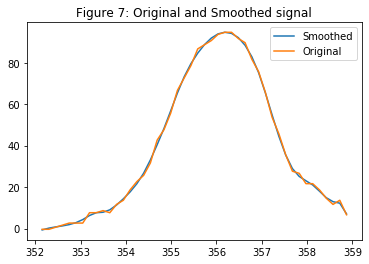

In [64]:
from scipy.interpolate import UnivariateSpline
zz = np.split(points[:, 2][~np.isnan(ints_conc)], peak_flp)[111]
zz = np.linspace(zz.min(), zz.max(), zz.shape[0])
univ = UnivariateSpline(zz, np_lst_noise[111])
plt.plot(zz, univ(zz), label = 'Smoothed')
plt.plot(zz, np_lst_noise[111], label = 'Original')
plt.title('Figure 7: Original and Smoothed signal')
plt.legend()
plt.show()

In [65]:
def data_preparation(points, np_lst_noise):
    z = np.split(points[:, 2][~np.isnan(ints_conc)], peak_flp)
    y = np.split(points[:, 1][~np.isnan(ints_conc)], peak_flp)
    x = np.split(points[:, 0][~np.isnan(ints_conc)], peak_flp)
    signal = np.array(np_lst_noise)
    z_np = np.array(z)
    y_np = np.array(y)
    x_np = np.array(x)
    signal_l = []
    for i in range(signal.shape[0]):
        if signal[i].shape[0] > 5:
            s = signal[i]
            signal_l.append(s)
    z_l = []
    for i in range(z_np.shape[0]):
        if z_np[i].shape[0] > 5:
            ee = z_np[i]
            z_l.append(ee)
    y_l = []
    for i in range(y_np.shape[0]):
        if y_np[i].shape[0] > 5:
            yy = y_np[i]
            y_l.append(yy)
    x_l = []
    for i in range(x_np.shape[0]):
        if x_np[i].shape[0] > 5:
            xx = x_np[i]
            x_l.append(xx)
    z_l_ = []
    for i in range(len(z_l)):
        new_height = np.linspace(z_l[i].min(), z_l[i].max(), z_l[i].shape[0])
        z_l_.append(new_height)
    peaks = []
    for i in range(len(signal_l)):
        peak_, proper_ = find_peaks(signal_l[i], prominence=5)
        if peak_.size == 0:
                peak_ = np.nan
        peaks.append(peak_)
    import pandas as pd
    peak_df = pd.DataFrame(np.array(peaks))
    peak_nan = peak_df[~pd.isna(peak_df[0])]
    z_l_nan = np.array(z_l_)[~pd.isna(peak_df[0])]
    x_l_nan = np.array(x_l)[~pd.isna(peak_df[0])]
    y_l_nan = np.array(y_l)[~pd.isna(peak_df[0])]
    signal_nan = np.array(signal_l)[~pd.isna(peak_df[0])]
    return(signal_nan, x_l_nan, y_l_nan, z_l_nan)

In [66]:
signal_nan, x_l_nan, y_l_nan, z_l_nan = data_preparation(points, np_lst_noise)

Now for the sake of saving space, we can delete original data and coordinates.

In [69]:
del points
del ints_conc

NameError: name 'points' is not defined

The fitting function takes intensity values and x, y, z values as an argument. The first step is smoothing all signals. Next step is finding peaks which will be used for initial values. However, even after smoothing some of the signals might have 2 or more peaks. It is better to avoid such signals by using this condition -- peaks.shape[0] > 1. In one little experiment, 1 out of 80000 signals had more than one peak. After cleaning dataset and coordinates from such signals final step is fitting gaussian to the dataset.

In [78]:
def fitting(signal_nan, x_l_nan, y_l_nan, z_l_nan):
    from scipy.interpolate import UnivariateSpline
    usp = []
    for i in range(len(signal_nan)):
        univ = UnivariateSpline(z_l_nan[i], signal_nan[i])
        usp.append(univ)
    usp = np.array(usp)
    peaks_ = []
    for i in range(len(usp)):
        peaks, properties = find_peaks(usp[i](z_l_nan[i]), prominence = 5)
        if peaks.size == 0:
                peaks = np.full(1, np.nan)
        if peaks.shape[0] > 1:
                peaks = np.full(1, np.nan)
        peaks_.append(peaks)
    pik = np.concatenate(peaks_)
    pik_ = pik[~np.isnan(pik)]
    pik_int = []
    for i in range(len(pik_)):
        p = int(pik_[i])
        pik_int.append(p)
    pik_int = np.array(pik_int)
    signal_l_ = signal_nan[~np.isnan(pik)]
    z_l_n = z_l_nan[~np.isnan(pik)]
    x_l_n = x_l_nan[~np.isnan(pik)]
    y_l_n = y_l_nan[~np.isnan(pik)]
    usp_ = np.array(usp)[~np.isnan(pik)]
    from lmfit import Model
    peak_cent = []
    peak_wdt = []
    peak_am = []
    for i in range(len(signal_l_)):
        initial_peak_x = z_l_n[i][pik_int[i]]
        initial_peak_y = usp_[i](z_l_n[i])[pik_int[i]]
        peak_width,peak_amp,peak_center = fit_gaussian(usp_[i](z_l_n[i]),
                                            z_l_n[i],initial_peak_y,initial_peak_x, 1)
        peak_cent.append(peak_center), peak_wdt.append(peak_width),
        peak_am.append(peak_amp)
    gaus = []
    for i in range(len(signal_l_)):
        gaussian_ = gaussian(z_l_n[i], peak_am[i], peak_cent[i], peak_wdt[i])
        gaus.append(gaussian_)
    return(gaus, usp_, peak_cent, peak_wdt, peak_am, x_l_n, y_l_n, z_l_n)

In [79]:
gaus, usp_, peak_cent, peak_wdt, peak_am, x_l_n, y_l_n, z_l_n = fitting(signal_nan, x_l_nan, y_l_nan, z_l_nan)

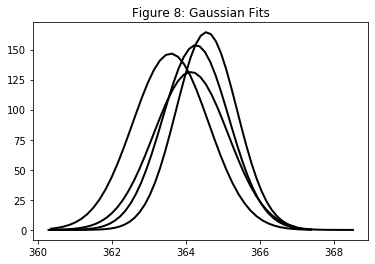

In [80]:
plt.plot(z_l_n[0], gaus[0], 'k-', linewidth=2)
plt.plot(z_l_n[1], gaus[1], 'k-', linewidth=2)
plt.plot(z_l_n[2], gaus[2], 'k-', linewidth=2)
plt.plot(z_l_n[3], gaus[3], 'k-', linewidth=2)
plt.title('Figure 8: Gaussian Fits')
plt.show()

The last step would be finding peaks of fits and creating point cloud out of it.

In [81]:
def peak_finder_for_fit(gaus, x_l_n, y_l_n, z_l_n):
    peak_fit = []
    for i in gaus:
        peak_f, properties_f = find_peaks(i, prominence = 5)
        if peak_f.size == 0:
            peak_f = np.full(1, np.nan)
        peak_fit.append(peak_f)
    peak_fit_np = np.concatenate(np.array(peak_fit))
    peak_fit_np_ = peak_fit_np[np.where(~np.isnan(peak_fit))[0]].astype(int)
    fit_np_ = np.array(gaus)[np.where(~np.isnan(peak_fit))[0]]
    ff_peak = []
    for i in range(fit_np_.shape[0]):
        fft_peak = fit_np_[i][peak_fit_np_[i]]
        ff_peak.append(fft_peak)
    x_peak = []
    x_np = np.array(x_l_n)[np.where(~np.isnan(peak_fit))[0]]
    for i in range(fit_np_.shape[0]):
        x_p = x_np[i][peak_fit_np_[i]]
        x_peak.append(x_p)
    y_peak = []
    y_np = np.array(y_l_n)[np.where(~np.isnan(peak_fit))[0]]
    for i in range(fit_np_.shape[0]):
        y_p = y_np[i][peak_fit_np_[i]]
        y_peak.append(y_p)
    z_np = np.array(z_l_n)[np.where(~np.isnan(peak_fit))[0]]
    z_peak = []
    for i in range(fit_np_.shape[0]):
        z_p = z_np[i][peak_fit_np_[i]]
        z_peak.append(z_p)
    ff_peak = np.array(ff_peak)
    pnts_peak = np.transpose((np.array(x_peak), np.array(y_peak), np.array(z_peak)))
    return(ff_peak, pnts_peak)

In [82]:
fit_peaks, fit_points = peak_finder_for_fit(gaus, x_l_n, y_l_n, z_l_n)

In [83]:
import laspy
save('fit_.las', fit_peaks, fit_points)

New las file contains approximately 789000 points.

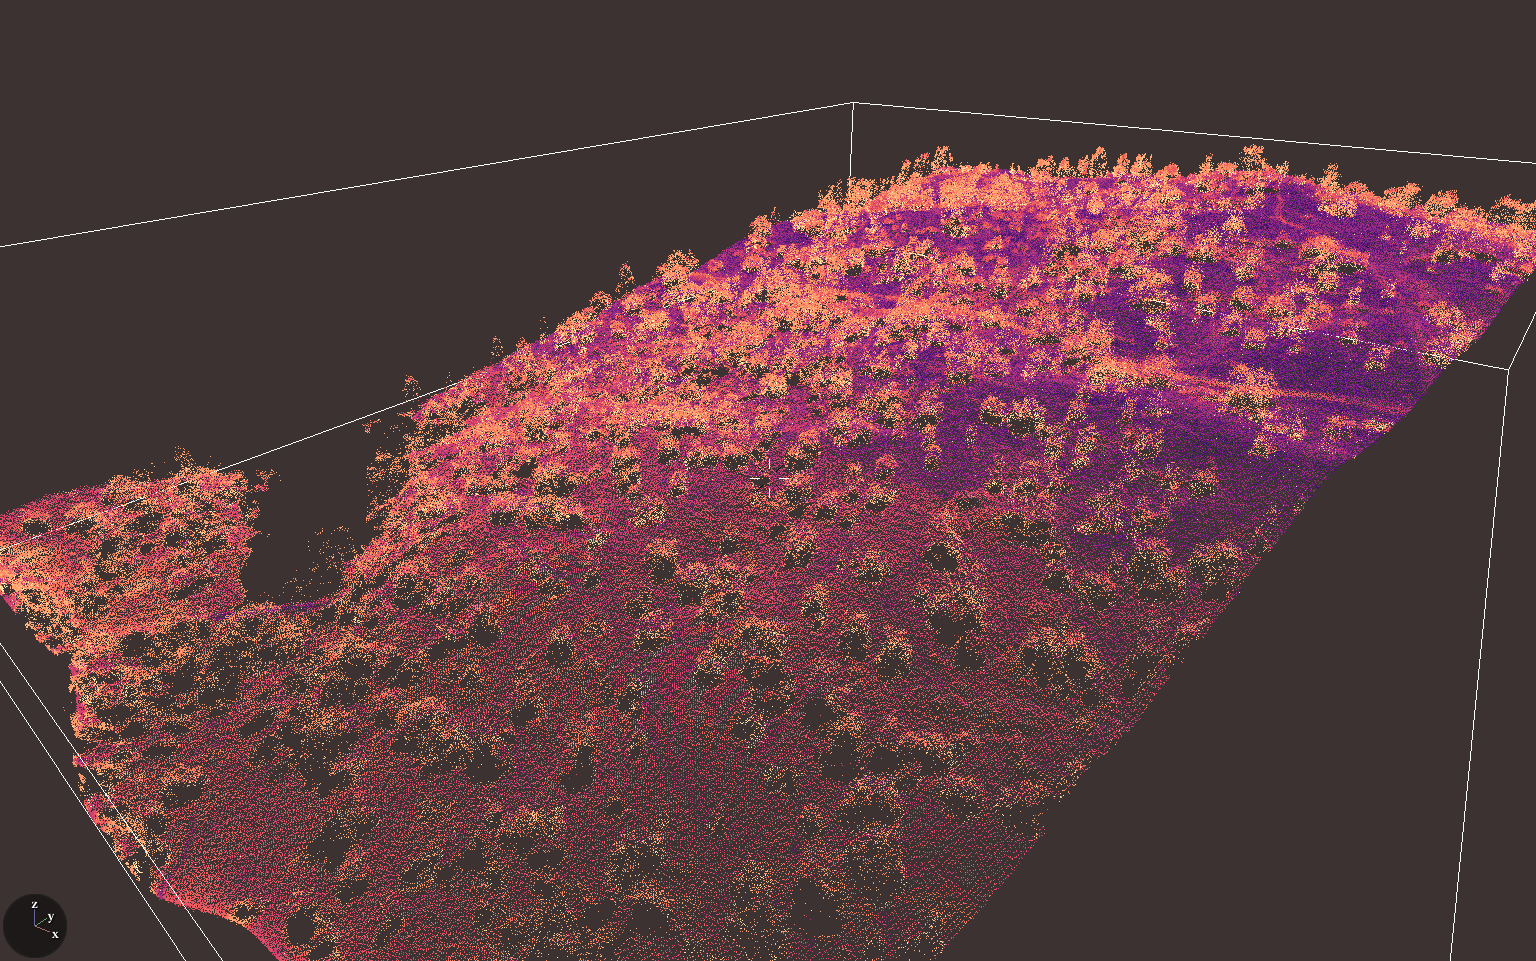